# Clustering the Countries using **K-Means** for HELP International
## by *Patrick Amadeus Irawan*
---
---

#  **Libraries used for EDA and Modelling**

In [5]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **Data Gathering and Overview**

In [6]:
df = pd.read_csv(r'Data_Negara_HELP.csv')

In [7]:
df.shape

(167, 10)

In [8]:
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Penjelasan kolom fitur:

- Negara : Nama negara
- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor : Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorang
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


    NOTES
    Sebagian Besar data berbentuk numerik kecuali nama negara

In [10]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
df.corr()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Kematian_anak,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
Ekspor,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
Kesehatan,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
Impor,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
Pendapatan,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
Inflasi,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
Harapan_hidup,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
Jumlah_fertiliti,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
GDPperkapita,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [12]:
df.isnull().any()

Negara              False
Kematian_anak       False
Ekspor              False
Kesehatan           False
Impor               False
Pendapatan          False
Inflasi             False
Harapan_hidup       False
Jumlah_fertiliti    False
GDPperkapita        False
dtype: bool

    NOTES
    Dapat dipastikan data bersih dan tidak memerlukan handling missing values (difokuskan ke arah preprocessing outliers)

----
----
# **Data Preprocessing Section**

### Untuk memudahkan process preprocessing ,  dibentuk sebuah fungsi yang dapat menentukan batas atas dan batas bawah masing-masing data kolom di DataFrame

In [13]:
def batas(column,df):
    Q1,Q3 = df[column].quantile(0.25) , df[column].quantile(0.75)
    IQR = Q3-Q1
    return (Q1-1.5*IQR , Q3+1.5*IQR)

### Analisa range data normal untuk masing-masing kolom numerik

In [14]:
for column in df.columns[1:]:
    print(column, batas(column,df))

Kematian_anak (-72.525, 142.875)
Ekspor (-17.524999999999988, 92.67499999999998)
Kesehatan (-0.6000000000000023, 14.120000000000005)
Impor (-12.625000000000004, 101.575)
Pendapatan (-25812.5, 51967.5)
Inflasi (-11.6, 24.16)
Harapan_hidup (48.05, 94.05)
Jumlah_fertiliti (-1.3325, 7.0075)
GDPperkapita (-17750.0, 33130.0)


### Deteksi Visualisasi Outliers dengan menggunakan **seaborn** boxplot

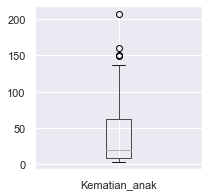

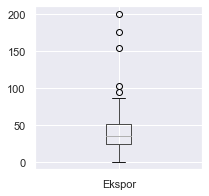

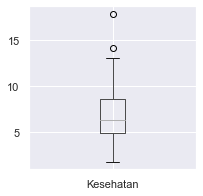

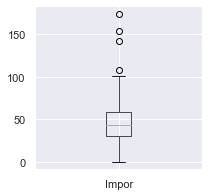

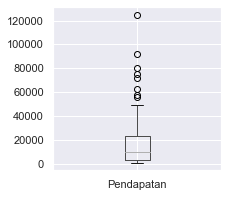

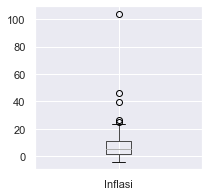

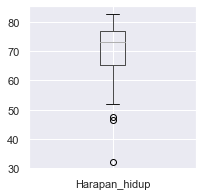

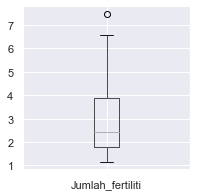

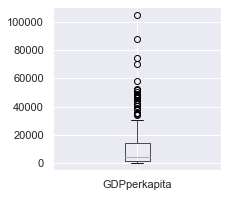

In [15]:
for column in df.columns[1:]:
    plt.figure(figsize=(3,3))
    sns.set_theme()
    df.boxplot([column])


### Terlihat dengan jelas bahwa terdapat sejumlah data yang terduga **outliers** berdasarkan visualisasi singkat dari boxplot tersebut pada tiap-tiap column DataFrame

## Testing Menghilangkan Outliers dari DataFrame

In [16]:
df_clean = df
for column in df_clean.columns[1:]:
    df_clean = df_clean.loc[(df_clean[column] >= batas(column , df_clean)[0]) &(df_clean[column]<=batas(column,df_clean)[-1])]

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            125 non-null    object 
 1   Kematian_anak     125 non-null    float64
 2   Ekspor            125 non-null    float64
 3   Kesehatan         125 non-null    float64
 4   Impor             125 non-null    float64
 5   Pendapatan        125 non-null    int64  
 6   Inflasi           125 non-null    float64
 7   Harapan_hidup     125 non-null    float64
 8   Jumlah_fertiliti  125 non-null    float64
 9   GDPperkapita      125 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 10.7+ KB


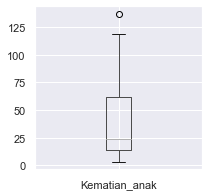

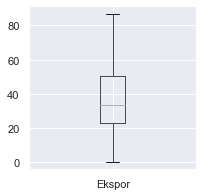

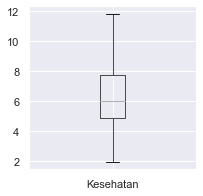

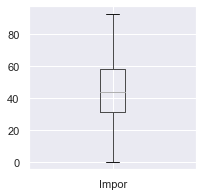

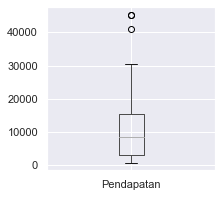

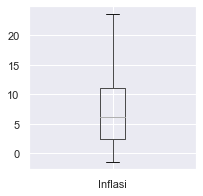

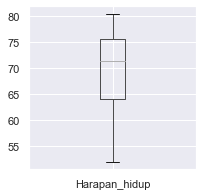

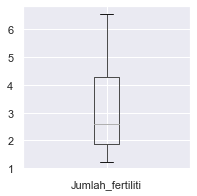

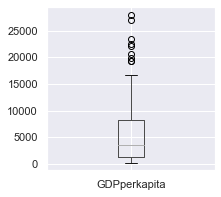

In [18]:
for column in df_clean.columns[1:]:
    plt.figure(figsize=(3,3))
    sns.set_theme()
    df_clean.boxplot([column])

### Dari data cleaning yang dilakukan ,  terlihat jumlah data yang dieliminasi ada sebanyak 42 baris (dengan outliers) yang berisi 1 kolom / lebih dengan data mengandung outliers.

<br/><br/>


# **Mengapa Tidak Handle Outliers untuk Kasus ini?**

### Visualisasi boxplot menunjukkan outliers data sudah ditangani. Namun , jumlah data yang hilang mendekati nilai 1/4 data dan menurut pengamatan dan research dari berbagai sumber ,  variabel yang terdeteksi sebagai outliers sebenernya bukan sebuah outliers, melainkan memang data dengan variansi yang cenderung besar secara economic dan paramater lainnya sehingga memang berupa sebuah fakta.

- ## Berikut daftar negara-negara yang hilang akibat **preprocessing**

In [19]:
count = 0
for i in df.Negara.values:
    if i not in df_clean.Negara.values:
        print(i ,end=" | ")
        count+=1
print("\n\nJumlah total negara yang hilang :",count)
print("Jumlah akhir negara dengan data bersih :",len(df_clean))

Australia | Austria | Belgium | Brunei | Canada | Central African Republic | Chad | Cyprus | Denmark | Equatorial Guinea | Finland | France | Germany | Haiti | Iceland | Ireland | Israel | Italy | Japan | Kuwait | Lesotho | Luxembourg | Malta | Micronesia, Fed. Sts. | Mongolia | Netherlands | New Zealand | Niger | Nigeria | Norway | Qatar | Seychelles | Sierra Leone | Singapore | Spain | Sweden | Switzerland | Timor-Leste | United Arab Emirates | United Kingdom | United States | Venezuela | 

Jumlah total negara yang hilang : 42
Jumlah akhir negara dengan data bersih : 125


## Sehingga dengan pertimbangan tersebut , kita tetap menggunakan data asli yaitu data dengan jumlah negara sebanyak 167 negara.

In [20]:
df_clean = df

----
----

# **Data Scaling**

### Konsep Penggunaan method **sklearn KMeans** memerlukan data yang telah melalui proses scaling

In [21]:
s = StandardScaler()
features = df_clean.columns[1:]

scaled_features = s.fit_transform(df_clean[features]).tolist()
for i in range(len(df_clean.Negara.values)):
    scaled_features[i] = [df_clean.Negara.values[i]] + scaled_features[i]

df_clean_scaled = pd.DataFrame(scaled_features ,columns= df_clean.columns)
df_clean_scaled.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


----
---

# **Unsupervised Machine Learning** Modelling Section

### Using **_sklearn.cluster_** to generate unsupervised models based on multiple parameters / features
### Testing dependency inertia dengan menggunakan _elbow method_ 

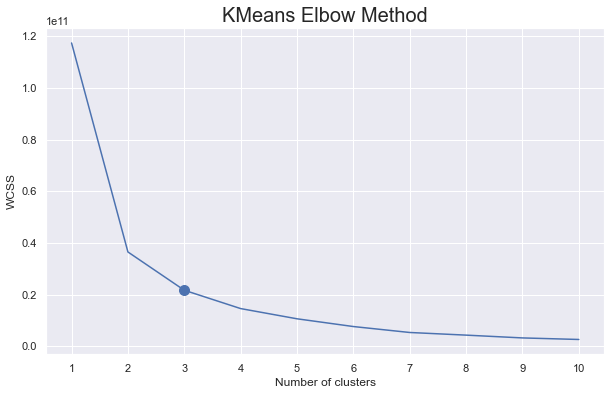

In [22]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters = i).fit(df_clean[df_clean.columns[1:]])
    clusters.append(km.inertia_)

f,ax = plt.subplots(figsize = (10,6))
plt.plot([i for i in range(1,11)] , clusters , markevery = [2] , marker = "o" , markersize = 10)
plt.title("KMeans Elbow Method" ,size= 20)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.xticks([i for i in range(1,11)])
plt.show()


### Dapat dilihat elbow terletak pada **n_clusters** = 3 , sehingga kita menggunakan tuning parameter dengan **n_clusters** = 3.

## Fitting **Model** and Assigning **Labels**

In [23]:
km = KMeans(n_clusters = 3).fit(df_clean_scaled[df.columns[1:]])
df_clean_scaled['label'] = km.labels_

### Data with Label Assigned

In [24]:
df_clean_scaled.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,2
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


-----
-----

# **Visualize Cluster Models**

### Untuk visualisasi data, kita menggunakan model 2 dimension-based sehingga feautures harus di decompose menjadi 2 kolom saja untuk visualisasi. Penggunaan **PCA** direkomendasikan untuk decomposition feature.

In [25]:
reduced_data = PCA(n_components=2).fit_transform(df_clean_scaled[df_clean_scaled.columns[1:-1]])

df_final = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
df_final['Negara'] = df_clean_scaled.Negara
df_final['Label'] = df_clean_scaled.label
df_final = df_final[['Negara','pca1','pca2','Label']]

df_final.head()

,Negara,pca1,pca2,Label
0,Afghanistan,-2.913025,0.095621,2
1,Albania,0.429911,-0.588156,1
2,Algeria,-0.285225,-0.455174,1
3,Angola,-2.932423,1.695555,2
4,Antigua and Barbuda,1.033576,0.136659,1


In [26]:
df_final['Label'].replace([0,1,2],['Good','Better','Bad'],inplace=True)

## Setelah melalui tahap dimensionality reduction untuk mempermudah visualisasi ,  kita lakukan plotting **cluster** map seperti berikut

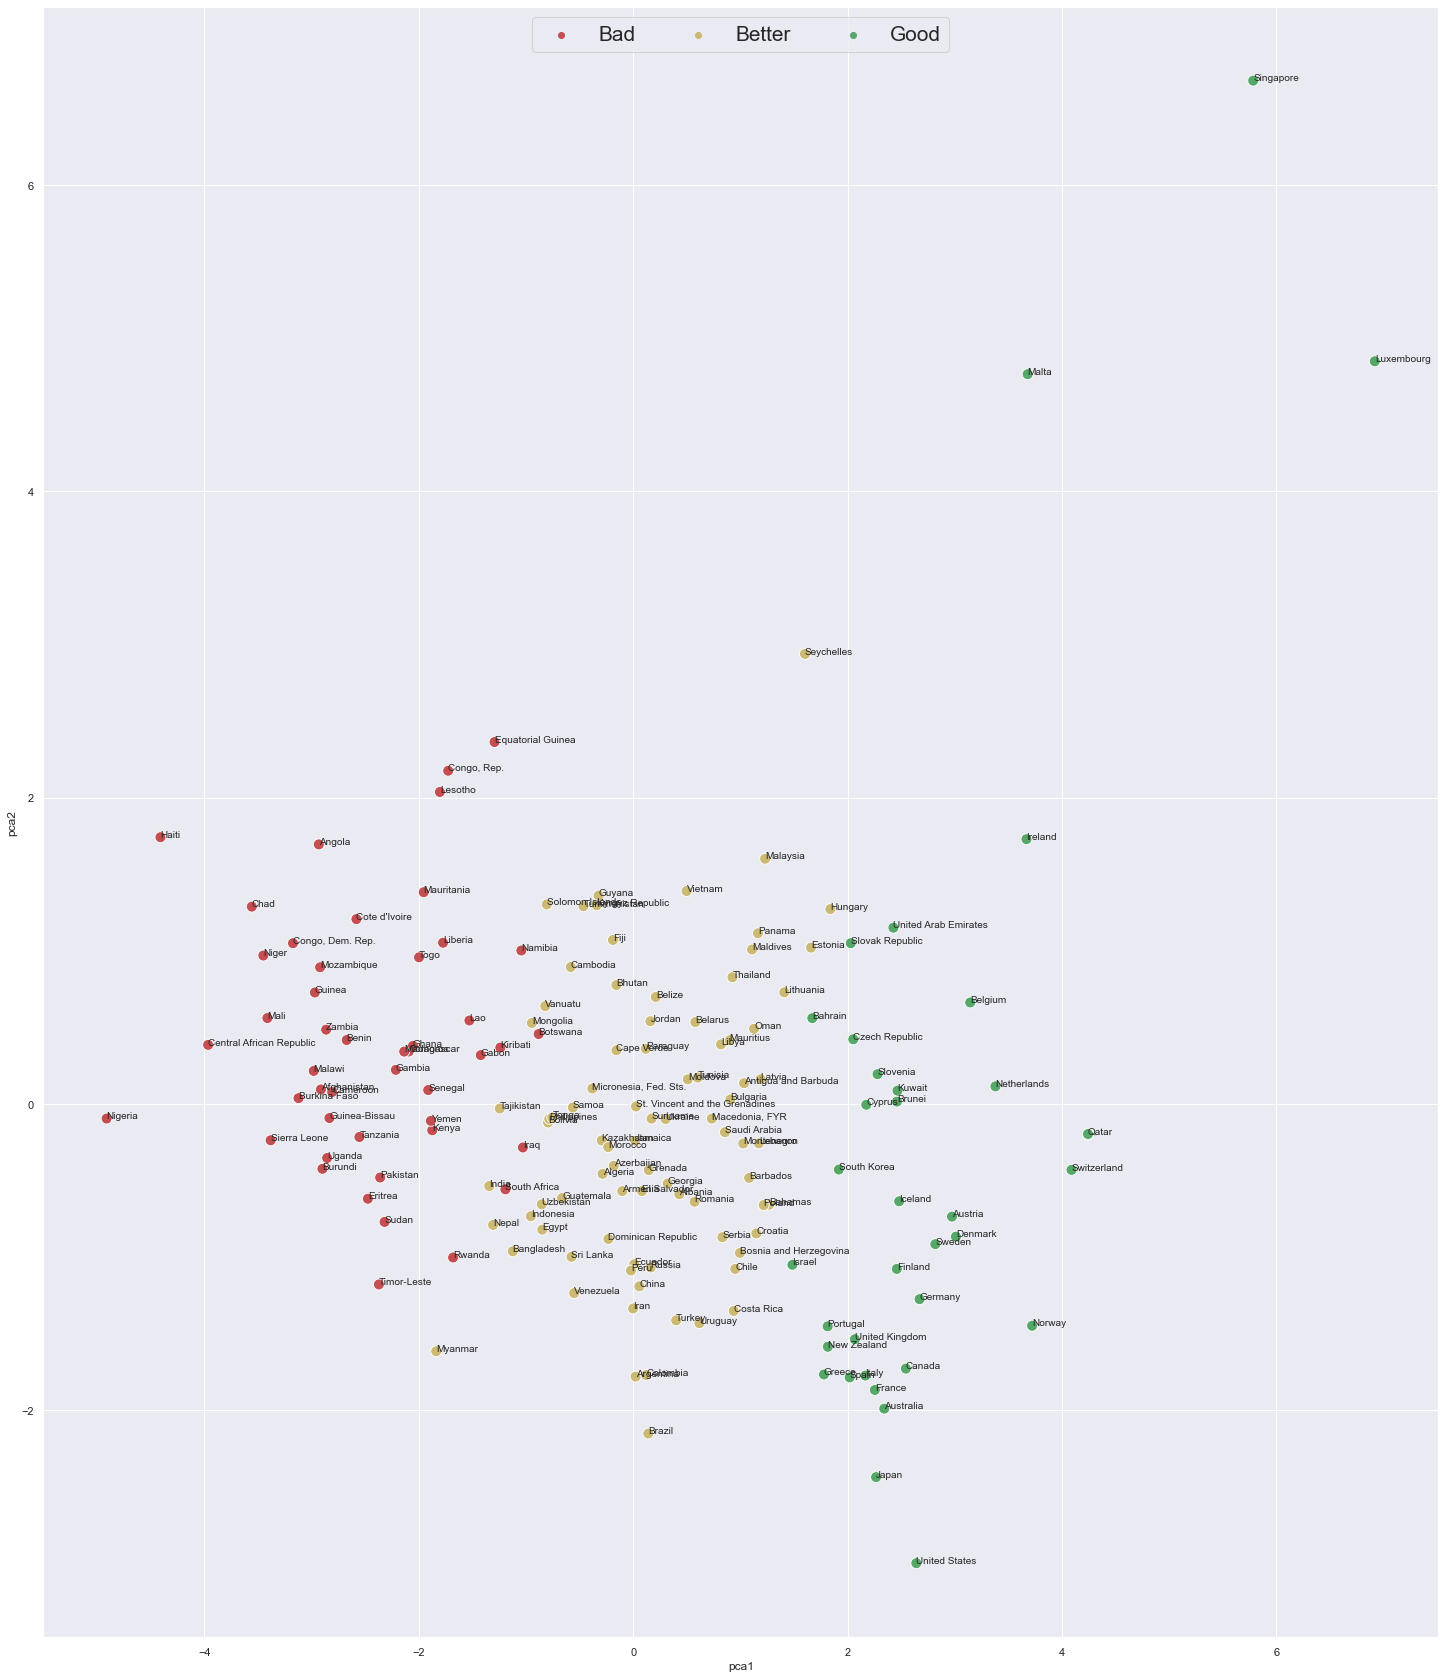

In [27]:
fig,ax = plt.subplots(figsize = (25,30))
sns.scatterplot(x="pca1", y="pca2", hue='Label', data=df_final , palette = ['r','y','g'],s = 120)
countries = df_final.Negara.values.tolist()
for i in df_final.values.tolist():
    plt.text(i[1], i[2], i[0] , size = 10)
plt.legend(loc = "upper center",ncol = 3 ,fontsize = 'xx-large')
plt.show()

----
----

# **Data Insights**

## Setelah dilakukan visualisasi cluster map , kita dapat mendata negara dengan label **_BAD_** sebagai negara prioritas dari pertimbangan features (ekonomi, sosial , kesehatan) untuk menjadi prioritas penerima bantuan dari **_HELP International_**

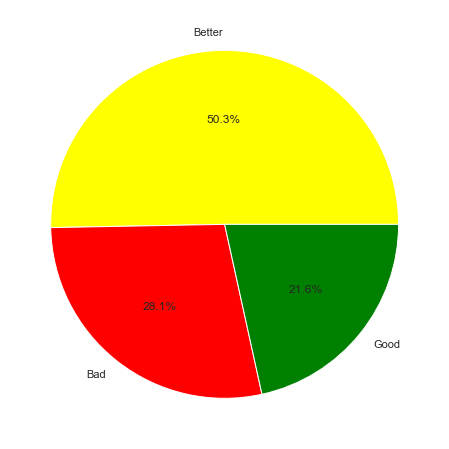

In [41]:
f,ax = plt.subplots(figsize = (12,8))
df_final.Label.value_counts().plot(kind='pie',autopct = "%1.01f%%" , colors =['yellow','red','green'])
plt.ylabel(None)
plt.show()

In [42]:
HELP = (df_final.loc[df_final.Label == "Bad"]['Negara'].values.tolist())
print("\n\n--- Negara-Negara Prioritas Penerima Bantuan dari HELP International ---\n")
print(' ; '.join(HELP))
print("\nJumlah negara :",len(HELP))
print("Persentase target penerima bantuan : 28.1% dari total negara")



--- Negara-Negara Prioritas Penerima Bantuan dari HELP International ---

Afghanistan ; Angola ; Benin ; Botswana ; Burkina Faso ; Burundi ; Cameroon ; Central African Republic ; Chad ; Comoros ; Congo, Dem. Rep. ; Congo, Rep. ; Cote d'Ivoire ; Equatorial Guinea ; Eritrea ; Gabon ; Gambia ; Ghana ; Guinea ; Guinea-Bissau ; Haiti ; Iraq ; Kenya ; Kiribati ; Lao ; Lesotho ; Liberia ; Madagascar ; Malawi ; Mali ; Mauritania ; Mozambique ; Namibia ; Niger ; Nigeria ; Pakistan ; Rwanda ; Senegal ; Sierra Leone ; South Africa ; Sudan ; Tanzania ; Timor-Leste ; Togo ; Uganda ; Yemen ; Zambia

Jumlah negara : 47
Persentase target penerima bantuan : 28.1% dari total negara
